# Projet MAD 
DE SOUSA Emilio & LAZZALI Samir

### Sommaire
- I - INTRODUCTION
- II - DESCRIPTION
 - Inportation et forme du DataSet 
 - Nettoyage des données
- III - STATISTIQUE DESCRIPTIVE UNIDIMENSIONNEL
  - Rating  
  - Category
  - Reviews  
  - Size
  - Installs
  - Type
  - Type (gratuit payant)
  - Price
  - Content Rating
  - Etude de Genres
- IV - STATISTIQUE DESCRIPTIVE BIDIMENSIONNEL (Par rapport au Rating)
  - Category
  - Reviews
  - Size
  - Installs
  - Price
  - Content Rating
  - Genres
- V - STATISTIQUE DESCRIPTIVE MULTIDIMENSIONNELLE
  - ANALYSE EN COMPOSANTE PRINCIPALES (ACP)	
- VIII - CONCLUSION






# INTRODUCTION
#### Dire des choses ici 


In [1]:
# importation des librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from scipy.special import boxcox1p

# DESCRIPTION
#### Dire des choeses ici 

## Importation et forme du DataSet

In [2]:
data = pd.read_csv("googleplaystore.csv")
dataType = data.dtypes
print(data.shape)
data.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### On calcule le pourcentage de valeur null en fonction des variables

In [3]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)


,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


## Nettoyage des données 


In [4]:

data.dropna(how ='any', inplace = True)
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [5]:
#forme actuelle :
print(data.shape)


(9360, 13)


# STATISTIQUE DESCRIPTIVE UNIDIMENSIONNEL

## Rating

In [6]:
data.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution des notes')

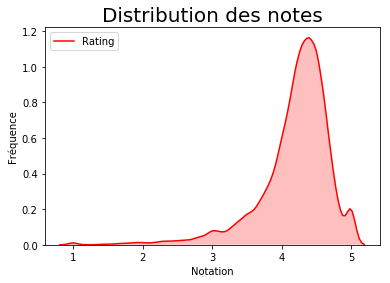

In [7]:
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Notation")
g.set_ylabel("Fréquence")
plt.title('Distribution des notes',size = 20)
#plt.savefig('rating_freq.png')

## Category

In [8]:
print( len(data['Category'].unique()) , "categories")

print("\n", data['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, "Nombre d'application pour chaque catégorie")

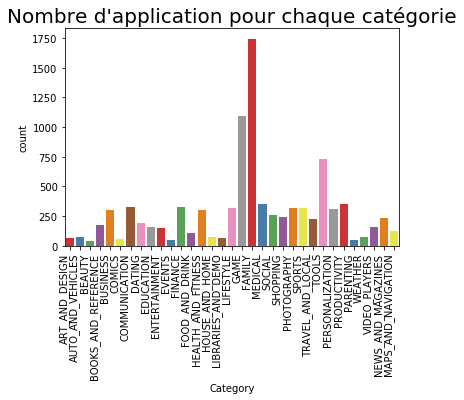

In [9]:
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Nombre d\'application pour chaque catégorie' ,size = 20)
#plt.savefig('count_cat.png',bbox_inches='tight')

#### Les catégories Jeu et Famille sont les plus populaires pour les applications.

## Reviews

In [10]:
data['Reviews'].head()


0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

#### Les données sont encore dans le type d'objet, nous avons besoin de convertir les en int

In [11]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Distribution des Reveiw')

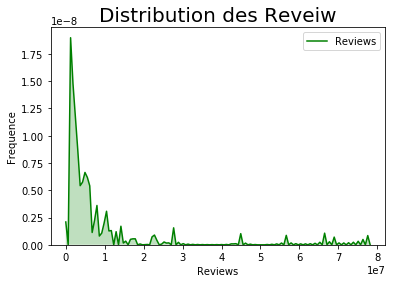

In [12]:
g = sns.kdeplot(data.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequence")
plt.title('Distribution des Reveiw',size = 20)

#### La plupart des applications ont moins d'un million d'évaluations. Évidemment, les applications bien connues ont beaucoup d'évaluations

## Size 

In [13]:
data['Size'].unique()[:30]

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M'], dtype=object)

#### Les données sont toujours dans du type objet et contiennent l'unité, il y aussi et des **Varies with device** à supprimer

In [14]:
len(data[data.Size == 'Varies with device'])


1637

#### **Nettoyage des donées** : On les convertis d'abord en NA.
On supprime les unité **k** ou **M** 

In [15]:
data['Size'].replace('Varies with device', np.nan, inplace = True )


# Et la pourquoi tu fillna(1) pour remplacer les na et apres tu veux remplacer les na par mean ???


In [16]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

# La tu affecte la mean à tes NA mais tu les a replacé par 1 en haut 

In [17]:
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

Text(0.5, 1.0, 'Distribution des tailles')

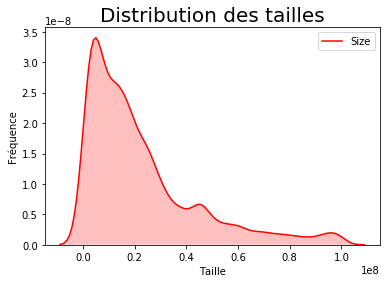

In [18]:
g = sns.kdeplot(data.Size, color="Red", shade = True)
g.set_xlabel("Taille")
g.set_ylabel("Fréquence")
plt.title('Distribution des tailles',size = 20)

## Installs

In [19]:
data['Installs'].unique()[:10]


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+'],
      dtype=object)

#### Les données sont toujours dans le type d'objet et contiennent le signe +.
**Nettoyage des donées**, on les transforme  
- 0 = 1+
- 1 = 5+
- 2 = 10+
- etc

In [20]:
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))
data['Installs'].unique()



array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [21]:
Sorted_value = sorted(list(data['Installs'].unique()))
data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )
data['Installs'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

# J'ai pas compris cette ligne au dessus : data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True ) ???



Text(0.5, 1.0, 'Distribution des installations')

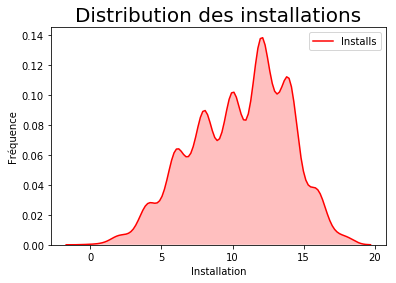

In [22]:
g = sns.kdeplot(data.Installs, color="Red", shade = True)
g.set_xlabel("Installation")
g.set_ylabel("Fréquence")
plt.title('Distribution des installations',size = 20)

##  Type (gratuit payant)

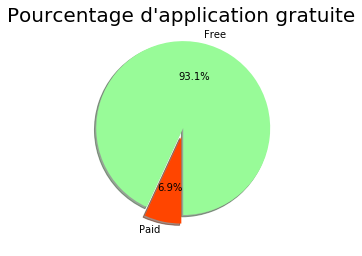

In [23]:
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Pourcentage d\'application gratuite',size = 20)
plt.show()

#### La plupart des applications sont gratuites (93,1%).

## Price

In [24]:
data.Price.unique()[:30]

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95'], dtype=object)

#### **Nettoyage des donées**, on supprime le $ des prix avant de les convertir en float

In [25]:

data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))


In [26]:
data['Price'].describe()


count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

#### Le prix moyen est d'environ 0,96, mais la plupart sont gratuits (8715/9360).


In [27]:
print( 'L\'application la plus chère est à 400 dollars : ')
data[data['Price'] == 400]['App']


L'application la plus chère est à 400 dollars : 


4367    I'm Rich - Trump Edition
Name: App, dtype: object

Text(0.5, 1.0, 'Distribution du prix')

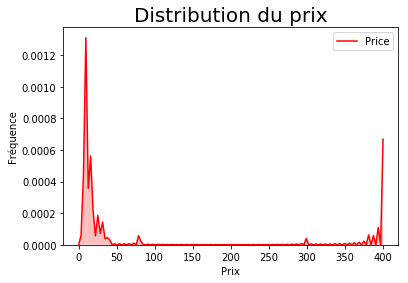

In [28]:
g = sns.kdeplot(data.Price, color="Red", shade = True)
g.set_xlabel("Prix")
g.set_ylabel("Fréquence")
plt.title('Distribution du prix',size = 20)

## Content Rating

In [29]:
data['Content Rating'].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [30]:
# Comme il n'y a qu'une line avec
# un ContenRating : Unrated on le supprime du dataset 
data = data[data['Content Rating'] != 'Unrated']

#### Nous reviendrons sur cette variable lors de l'analyse 2D

## Etude de Genres

In [31]:
print( len(data['Genres'].unique()) , "genres")

print("\n", data['Genres'].unique())

115 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educati

#### Les genres sont varier car ils sont parfois ratacher a un sous genre : `Arcade;Action & Adventure`

**Nettoyage des données**

#### On va donc ne conserver que le premier Genres et les grouper pour connaitre la répartition dans les Genres principaux. On va aussi fusionner `Group Music & Audio  et  Music`
#### il en reste 47 contre les 115 du debut.

In [32]:
data['Genres'] = data['Genres'].str.split(';').str[0]
data['Genres'].replace('Music & Audio', 'Music',inplace = True)
print( len(data['Genres'].unique()) , "genres")



47 genres


## Etude de LastUpdated

#### Last Update est toujours au format String, nous avons besoin de la transformer la tracer

# STATISTIQUE DESCRIPTIVE BIDIMENSIONNEL (par rapport au Rating)

## Rating / Category

Text(0.5, 1.0, 'Boîte à moustaches Rating / Category')

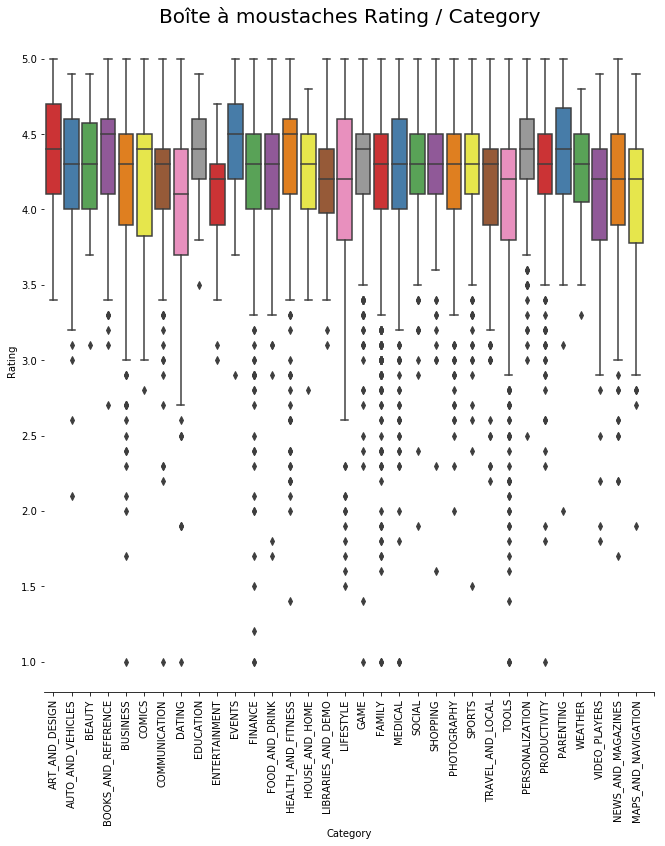

In [33]:
g = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boîte à moustaches Rating / Category',size = 20)

#### Le Rating ne different pas beaucoup pour chaque catégory

## Rating / Reviews

<Figure size 720x720 with 0 Axes>

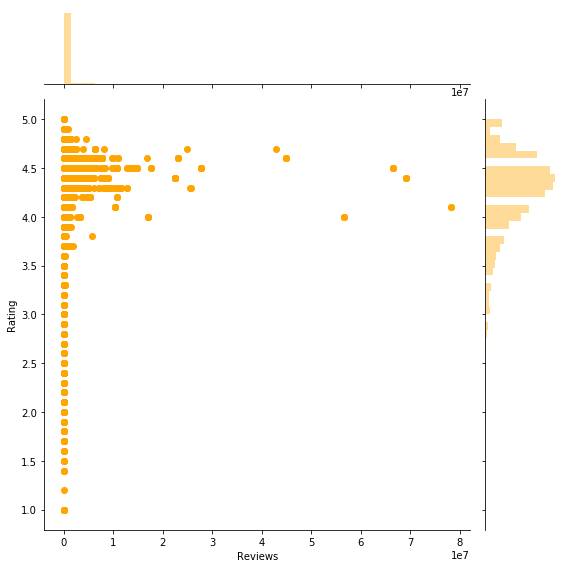

In [34]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=data,height = 8);


Text(0.5, 1.0, 'Rating VS Reveiws')

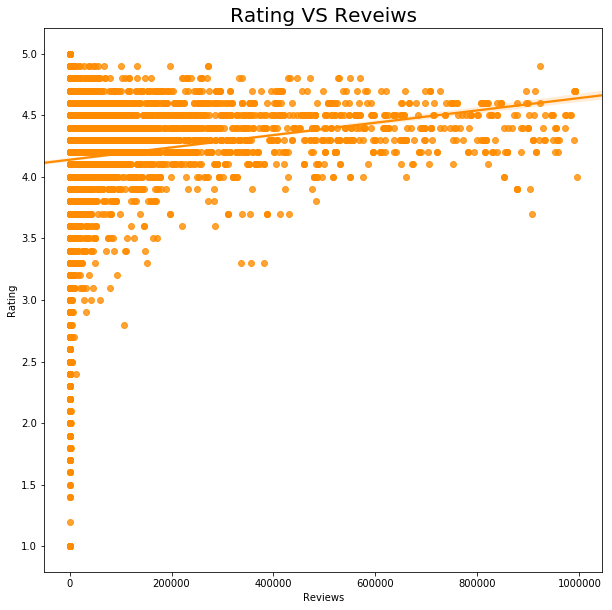

In [35]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

#### Il semble que les applications bien connues obtiennent une bonne note

## Rating / Size

<Figure size 720x720 with 0 Axes>

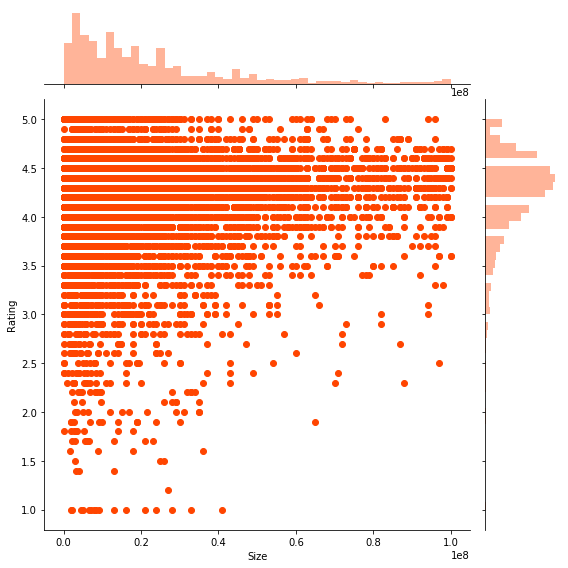

In [36]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=data, height = 8);

#### Un commentaire ? 

## Rating / Installs

Text(0.5, 1.0, 'Rating VS Installs')

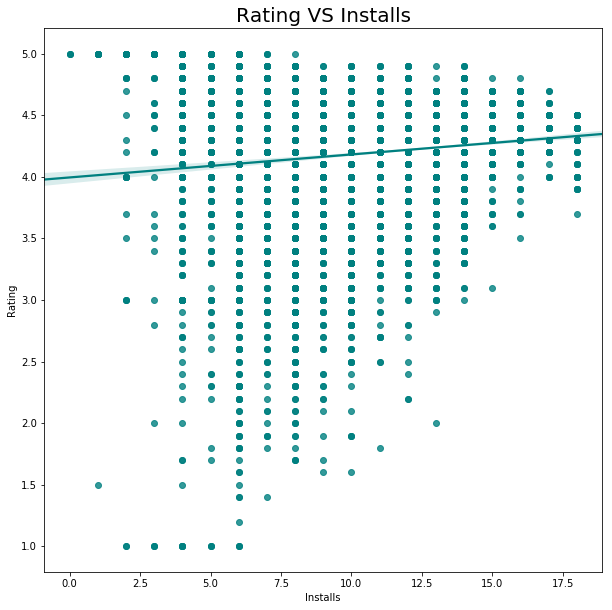

In [37]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating VS Installs',size = 20)

#### Il semblerait que le nombre d'installation affecte le Rating

## Rating / Price

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

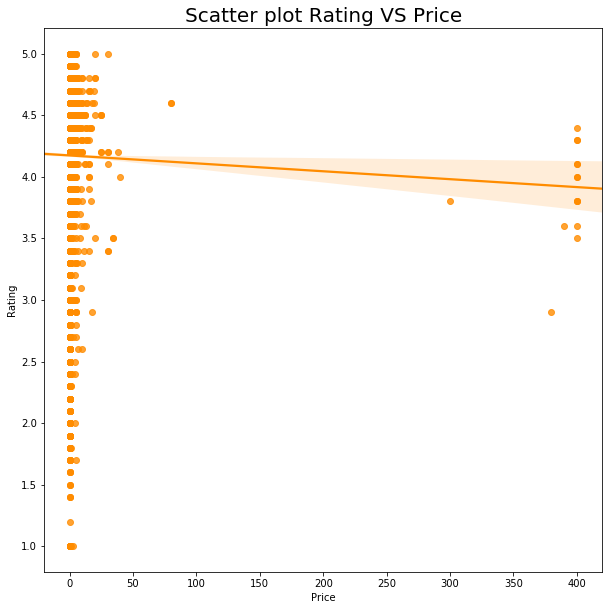

In [38]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 20)

#### Les applications d'un prix plus élevé semble plus décevoir le client. 
#### Pour la suite nous allons créer des fourchettes de prix : 
0  : '0 Gratuit'
0.01 <= 0.99: '1 bas de gamme'
0.99 <= 2.99 : '2 abordables'
2.99 <= 4.99): '3 normale'
4.99 <= 14.99): '4 cher'
14.99 <= 29.99): '5 tres cher'
supérieure à 29.99) : '6 trop cher'

In [39]:
data.loc[ data['Price'] == 0, 'PriceBand'] = '0 Gratuit'
data.loc[(data['Price'] > 0) & (data['Price'] <= 0.99), 'PriceBand'] = '1 bas de gamme'
data.loc[(data['Price'] > 0.99) & (data['Price'] <= 2.99), 'PriceBand']   = '2 abordable'
data.loc[(data['Price'] > 2.99) & (data['Price'] <= 4.99), 'PriceBand']   = '3 normale'
data.loc[(data['Price'] > 4.99) & (data['Price'] <= 14.99), 'PriceBand']   = '4 cher'
data.loc[(data['Price'] > 14.99) & (data['Price'] <= 29.99), 'PriceBand']   = '5 tres cher'
data.loc[(data['Price'] > 29.99), 'PriceBand']  = '6 trop cher'
data[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 Gratuit,4.186298
1,1 bas de gamme,4.300943
2,2 abordable,4.292975
3,3 normale,4.250318
4,4 cher,4.269149
5,5 tres cher,4.252000
6,6 trop cher,3.923810


#### Les applications bas de gamme entre 0.01 et 0,99 dollars ont les meilleurs notes

Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

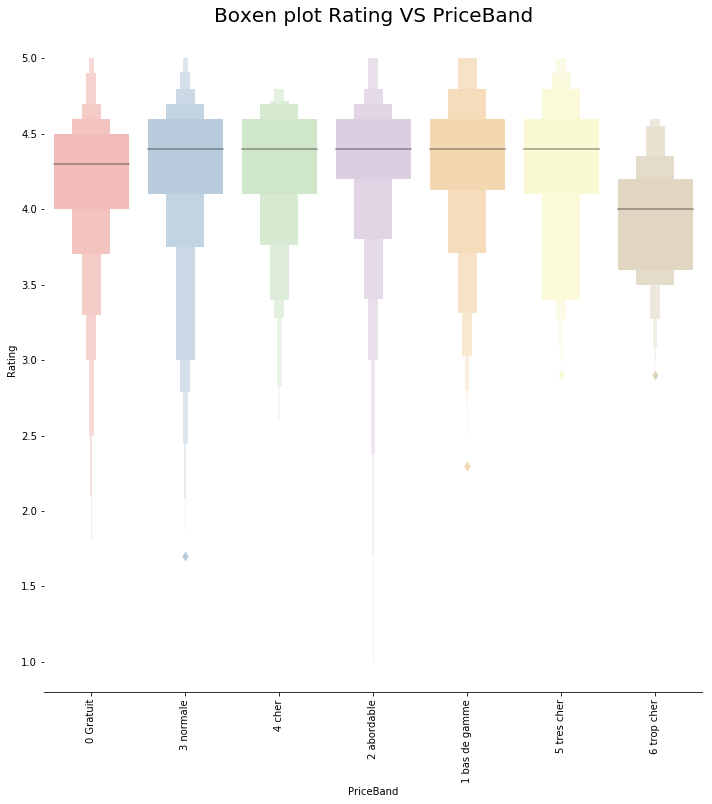

In [40]:
g = sns.catplot(x="PriceBand",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

#### Les prix n'ont pas d'effet sur le Rating , mais pour les applications trop cher le Rating peut etre plus mauvais


## Rating / Content Rating

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

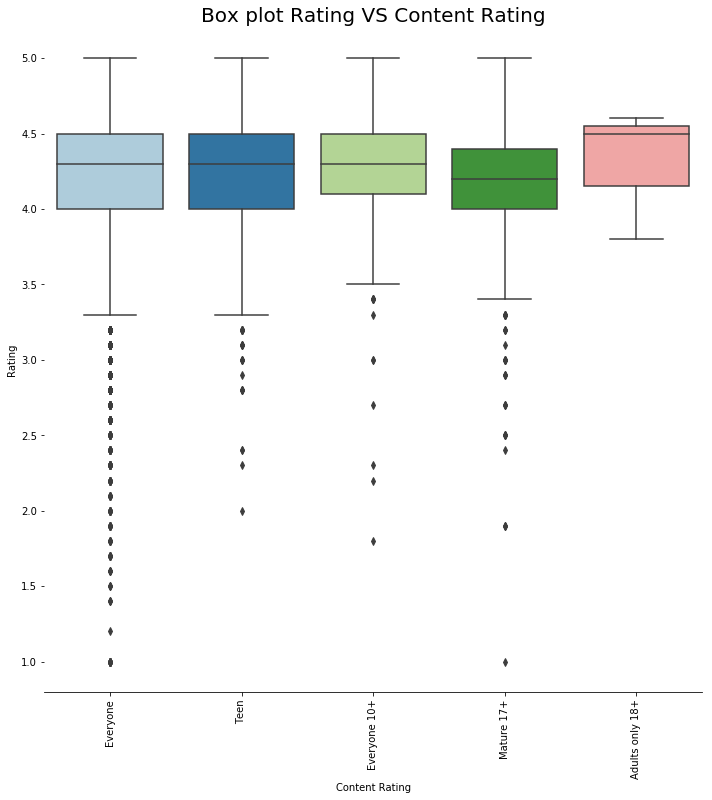

In [41]:
g = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

#### Le classement du contenu n'a pas trop d'effet sur le Rating, mais dans les applications 'Matures', ils ont l'air d'être moins bien notés que les autres.

## Rating / Genres

In [43]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.210662
std,0.104405
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


In [44]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(1)


,Genres,Rating
14,Dating,3.970769


In [45]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)


,Genres,Rating
18,Events,4.435556


#### Si l'on observe à partir de l'écart-type, le genre n'a pas trop d'effet sur la notation. La plus faible d'une note moyenne sur les genres (Rencontres) est de 3,97 alors que le plus élevé (Evénements) est de 4,43